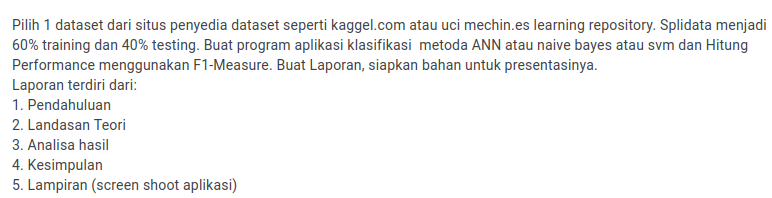

# CLASSIFICATION TASK
#### Copyright © 2020 Novita G.

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
from random import randint
import matplotlib.pyplot as plt 

## Read Data

In [3]:
df_iris = pd.read_csv('IRIS FLOWER.csv')
pd.set_option('display.max_rows', None)
df_iris

,Dataset order,Sepal length,Sepal width,Petal length,Petal width,Species
0,1,5.1,3.5,1.4,0.2,I.setosa
1,2,4.9,3.0,1.4,0.2,I.setosa
2,3,4.7,3.2,1.3,0.2,I.setosa
3,4,4.6,3.1,1.5,0.2,I.setosa
4,5,5.0,3.6,1.4,0.3,I.setosa
5,6,5.4,3.9,1.7,0.4,I.setosa
6,7,4.6,3.4,1.4,0.3,I.setosa
7,8,5.0,3.4,1.5,0.2,I.setosa
8,9,4.4,2.9,1.4,0.2,I.setosa
9,10,4.9,3.1,1.5,0.1,I.setosa


In [4]:
df_iris.shape

(150, 6)

In [5]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Dataset order  150 non-null    int64  
 1   Sepal length   150 non-null    float64
 2   Sepal width    150 non-null    float64
 3   Petal length   150 non-null    float64
 4   Petal width    150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
df_iris.describe()

,Dataset order,Sepal length,Sepal width,Petal length,Petal width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.200000
std,43.445368,0.828066,0.435866,1.765298,0.761401
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
# Modify columns name
df_iris.columns = [col.replace(' ', '_') for col in df_iris.columns]

# See all values of 'Species'
print('Species:', df_iris.Species.unique(), '\n')

# Encode classes (I.setosa = 0, I.versicolor = 1, I.virginica = 2)
target = df_iris[['Species']].replace(['I.setosa', 'I.versicolor', 'I.virginica'], [0, 1, 2])

Species: ['I.setosa' 'I.versicolor' 'I.virginica'] 



## Data Normalization
NB: Implemented without using sklearn MinMaxScaler library

In [8]:
def minMaxScaler():
    df = df_iris.loc[:, 'Sepal_length':'Petal_width']
    for col in df.columns:
        
        for i in range(len(df)):
            df[col][i] = (df[col][i] - min(df_iris[col]))/(max(df_iris[col]) - min(df_iris[col]))
    return df

In [9]:
df_norm = minMaxScaler()
df_norm

,Sepal_length,Sepal_width,Petal_length,Petal_width
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.083333
5,0.305556,0.791667,0.118644,0.125000
6,0.083333,0.583333,0.067797,0.083333
7,0.194444,0.583333,0.084746,0.041667
8,0.027778,0.375000,0.067797,0.041667
9,0.166667,0.458333,0.084746,0.000000


In [10]:
df = pd.concat([df_norm, target], axis = 1)
df

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
0,0.222222,0.625000,0.067797,0.041667,0
1,0.166667,0.416667,0.067797,0.041667,0
2,0.111111,0.500000,0.050847,0.041667,0
3,0.083333,0.458333,0.084746,0.041667,0
4,0.194444,0.666667,0.067797,0.083333,0
5,0.305556,0.791667,0.118644,0.125000,0
6,0.083333,0.583333,0.067797,0.083333,0
7,0.194444,0.583333,0.084746,0.041667,0
8,0.027778,0.375000,0.067797,0.041667,0
9,0.166667,0.458333,0.084746,0.000000,0


## Splitting Dataset

Actually, we can use train_test_split library, but here we will do it manually (based on task's rule given). There are 150 rows in total, so we have 150 * 0.6 = 90 training data and 150 * 0.4 = 60 testing data.

In [11]:
# Random shuffle number in range 0 to (length of dataset - 1)
random_num = np.arange(len(df))
np.random.shuffle(random_num)

# Take data with random_num less than 60% as training data
# and the remaining as testing data
df['train'] = random_num < (60/100) * len(df)
data_train = df[df['train'] == 1]
data_test = df[df['train'] == 0]

'''
Uncomment the code below, you will see 
the length of training data is 90
'''
# print(len(data_train)) 

data_train.drop('train', axis = 1)

,Sepal_length,Sepal_width,Petal_length,Petal_width,Species
2,0.111111,0.500000,0.050847,0.041667,0
4,0.194444,0.666667,0.067797,0.083333,0
5,0.305556,0.791667,0.118644,0.125000,0
6,0.083333,0.583333,0.067797,0.083333,0
7,0.194444,0.583333,0.084746,0.041667,0
9,0.166667,0.458333,0.084746,0.000000,0
10,0.305556,0.708333,0.084746,0.041667,0
11,0.138889,0.583333,0.101695,0.041667,0
12,0.138889,0.416667,0.067797,0.000000,0
13,0.000000,0.416667,0.016949,0.000000,0


In [12]:
X = data_train.values[:, :4]

'''
Uncomment the code below to see X
'''
# X

'\nUncomment the code below to see X\n'

In [13]:
# Define target matrix
target = [
    [1, 0, 0], # I.setosa
    [0, 1, 0], # I.versicolor
    [0, 0, 1] # I.virginica
]

'''
Uncomment the code below to see y
'''
y = np.array([target[int(x)] for x in data_train.values[:, 4:5]])
# y

## Propagation

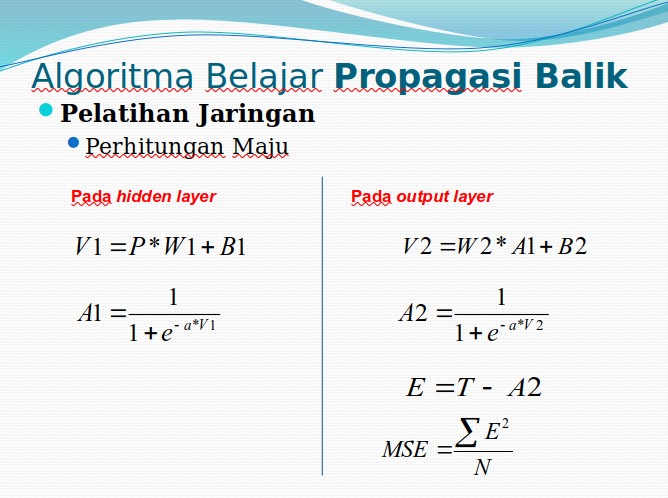

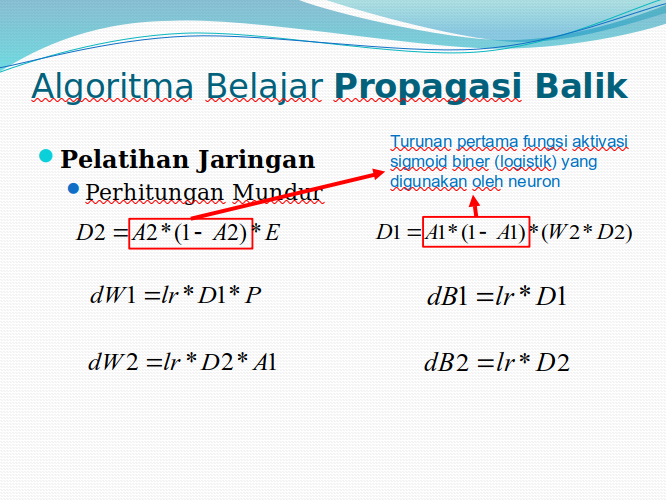

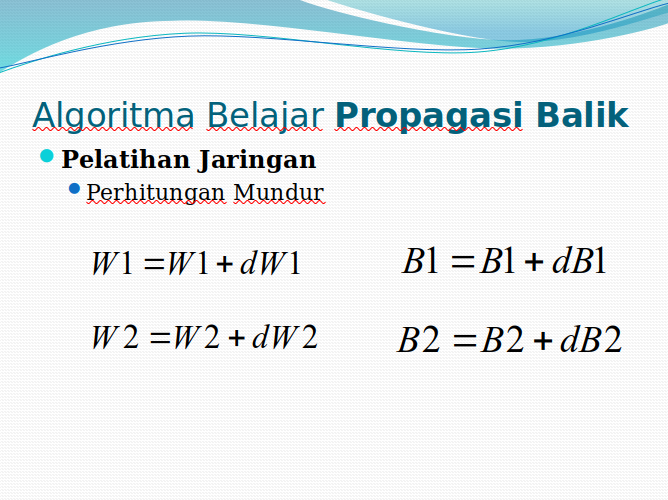

In [14]:
# Hyperparameters tuning
n = 5 # define hidden layer with n neurons
bias = 0
lr = 0.2
max_epoch = 1000

In [15]:
num_inputs = len(X[0]) # for each row, input x1, x2, x3, x4
num_outputs = len(y[0]) # output of 3 bits

# Randomize w1
W1 = np.random.random((num_inputs, n))
W2 = np.random.random((n, num_outputs))

# Training data
error = []
for epoch in range(80000):
    # Feed forward propagation
    V1 = (np.dot(X, W1)).astype(np.float)
    A1 = 1/(1 + np.exp(-(V1))) # sigmoid activation function
    
    V2 = (np.dot(A1, W2)).astype(np.float)
    A2 = 1/(1 + np.exp(-(V2)))
    
    err = (abs(y - A2)).mean()
    error.append(err)
    
    # Backpropagation
    D2 = A2 * (1 - A2) * (y - A2)
    dW2 = lr * A1.T.dot(D2)
    W2 = W2 + dW2
    
    D1 = A1 * (1 - A1) * D2.dot(W2.T)
    dW1 = lr * X.T.dot(D1)
    W1 = W1 + dW1
    
print(err)

0.032494715532336085


In [16]:
# Testing data
X = data_test.values[:, :4]
y = np.array([target[int(x)] for x in data_test.values[:, 4:5]])

V1 = (np.dot(X, W1)).astype(np.float)
A1 = 1/(1 + np.exp(-(V1))) # sigmoid activation function
    
V2 = (np.dot(A1, W2)).astype(np.float)
A2 = 1/(1 + np.exp(-(V2)))

np.round(A2, 3)

array([[1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.84 , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   ],
       [0.   , 0.992, 0.001],
       [0.   , 0.994, 0.002],
       [0.   , 0.931, 0.034],
       [0.   , 0.999, 0.001],
       [0.   , 1.   , 0.   ],
       [0.001, 1.   , 0.   ],
       [0.   , 1.   , 0.   ],
       [0.   , 0.35 , 0.73 ],
       [0.   , 0.163, 0.883],
       [0.   , 0.963, 0.016],
       [0.   , 0.96 , 0.015],
       [0.

In [17]:
# Take the largest value and decide wether it is
# I.setosa, I.versicolor, or I.virginica
y_pred = np.argmax(A2, axis = 1) # prediction
res = y_pred == np.argmax(y, axis = 1)
# correct = np.sum(res)/len(res)

test_res = data_test[['Species']].replace([0,1,2], ['I.setosa','I.versicolor','I.virginica'])

test_res['Prediction'] = y_pred
test_res['Prediction'] = test_res['Prediction'].replace([0,1,2], ['I.setosa','I.versicolor','I.virginica'])
test_res
# print(test_res)
# print('Correct:',sum(res),'/',len(res), ':', (correct*100),'%')


,Species,Prediction
0,I.setosa,I.setosa
1,I.setosa,I.setosa
3,I.setosa,I.setosa
8,I.setosa,I.setosa
14,I.setosa,I.setosa
15,I.setosa,I.setosa
17,I.setosa,I.setosa
19,I.setosa,I.setosa
20,I.setosa,I.setosa
22,I.setosa,I.setosa


In [70]:
# F1 Measure
mat_res = np.zeros((3, 3))
count = test_res.groupby(['Species', 'Prediction'])[['Species', 'Prediction']].count()
count

Species  Prediction
Species      Prediction                       
I.setosa     I.setosa           22          22
I.versicolor I.versicolor       17          17
             I.virginica         3           3
I.virginica  I.versicolor        3           3
             I.virginica        15          15

From the table above, we can conclude that:
- Precision(class = 'I.setosa') = 22/22 = 1; recall (class = 'I.setosa) = 22/22 = 1
- Precision(class = 'I.versicolor') = 17/20 = 0.85; recall (class = 'I.setosa) = 17/20 = 0.85
- Precision(class = 'I.virginica') = 15/18 = 0.83; recall (class = 'I.setosa) = 15/18 = 0.83

And the F1-Score for each class:
- F1-Score(class = 'I.setosa') = 2 * 1 * 1/(1 + 1) = 1
- F1-Score(class = 'I.versicolor') = 2 * 0.85 * 0.85/(0.85 + 0.85) = 0.85
- F1-Score(class = 'I.virginica') = 2 * 0.83 * 0.83/(0.83 + 0.83) = 0.83

Last, the accuracy is:
(22 + 17 + 15)/(22 + 0 + 0 + 0 + 17 + 3 + 0 + 3 + 15) = 0.9 = 90%